In [1]:
#Importamos librerías y cargamos los datos para que estén disponibles para todo el documento.

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

url = '../data/tips.csv'
df = pd.read_csv(url)
#this


## Exploración del dataset

In [2]:
df.info()
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

#Nos descargamos el HTML para facilitar su consulta.
profile.to_file("pandas_profiling_report.html")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Sun'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
days = df['day'].values
unique_days = np.unique(days)
print(unique_days)

# tip = df['tip'].values
# unique_tips = np.unique(tip)
# print(unique_tips)

mean = df['tip'].mean()
median = df['tip'].median()
mode = df['tip'].mode()
print(round(mean, 3), median, mode)

nan_count = df.isna().sum()
print(f"Recuento de nulos: \n{nan_count}" )

['Fri' 'Sat' 'Sun' 'Thur']
2.998 2.9 0    2.0
Name: tip, dtype: float64
Recuento de nulos: 
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [5]:
#Aunque en lugar de calcularlo manualmmente cada uno, podemos utilizar describe para acelearar
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## Gráficas con MATPLOT LIB y SEABORN

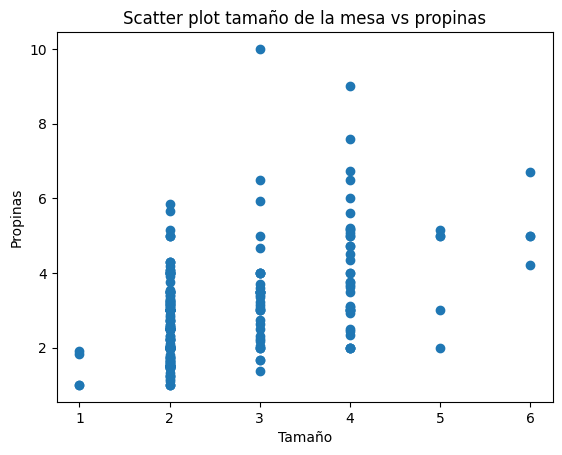

In [6]:
plt.scatter(df['size'], df['tip'])
plt.xlabel('Tamaño')
plt.ylabel('Propinas')
plt.title('Scatter plot tamaño de la mesa vs propinas')
plt.show()

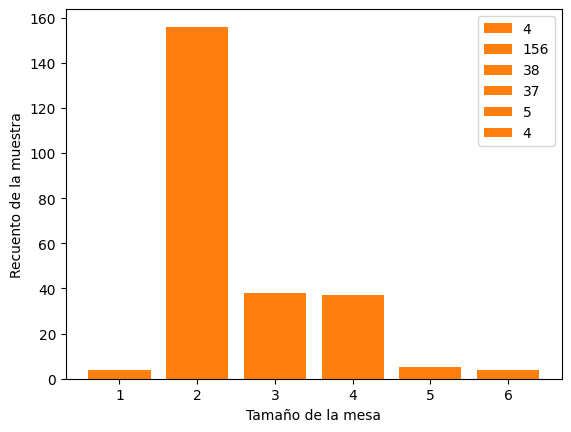

'\nObservamos que el tamaño de la muestra es muy bajo para las mesas de un tamaño igual a 1, 5 y 6 personas.\nEso puede provocar que en un futuro un análisis basado en esta variable pueda provocar ciertos problemas.\n'

In [7]:
df_tip_by_size = pd.DataFrame(df.groupby('size')['tip'].count()).reset_index()

plt.bar(df_tip_by_size['size'], df_tip_by_size['tip'])
plt.xlabel('Tamaño de la mesa')
plt.ylabel('Recuento de la muestra')
bars = plt.bar(df_tip_by_size['size'], df_tip_by_size['tip'])
labels = [str(bar.get_height()) for bar in bars]
plt.legend(bars, labels)
plt.show()

"""
Observamos que el tamaño de la muestra es muy bajo para las mesas de un tamaño igual a 1, 5 y 6 personas.
Eso puede provocar que en un futuro un análisis basado en esta variable pueda provocar ciertos problemas.
"""


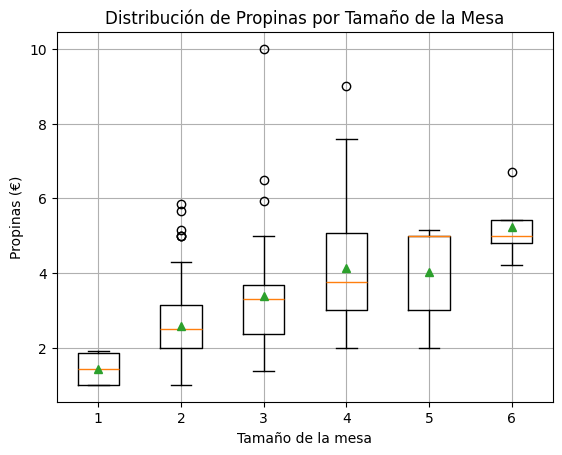

In [8]:
# SINTAXIS DE UN LIST COMPREHENSION: [expression for item in list]

tips_by_size = [df[df['size'] == size]['tip'] for size in sorted(df['size'].unique())]

# Crear el gráfico de caja
plt.boxplot(tips_by_size, showmeans=True)

# Añadir etiquetas y título
plt.xlabel('Tamaño de la mesa')
plt.ylabel('Propinas (€)')
plt.title('Distribución de Propinas por Tamaño de la Mesa')

plt.grid()
plt.show()


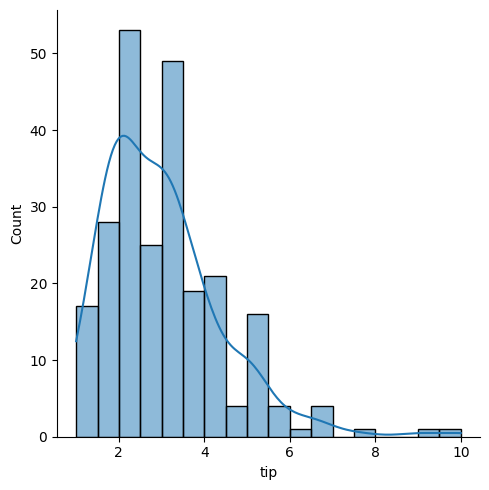

In [9]:
#Llevar a cabo alguna visualización univariante y multivariante con Matplotlib y Seaborn.
sns.displot(df['tip'], kde=True)

In [10]:
#Crear un modelo con scikit-learn para predecir la columna tip.

In [14]:
#Evaluar la precisión del modelo con las métricas de regresión.

In [15]:
"""
La columna tip es una variable continua, por tanto, se trata de un ejercicio de regresión. 
Con utilizar un modelo básico de regresión es suficiente. No se busca la máxima precisión para este ejercicio, 
se busca practicar los pasos comunes a la hora de crear modelos con scikit-learn.
"""

'\nLa columna tip es una variable continua, por tanto, se trata de un ejercicio de regresión. \nCon utilizar un modelo básico de regresión es suficiente. No se busca la máxima precisión para este ejercicio, \nse busca practicar los pasos comunes a la hora de crear modelos con scikit-learn.\n'

smoker
No     151
Yes     93
Name: count, dtype: int64

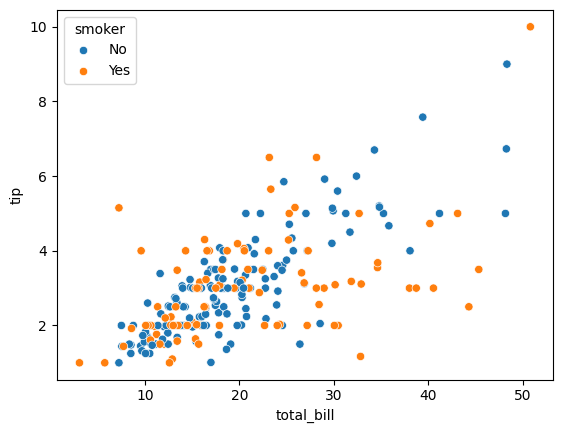

In [13]:
sns.scatterplot(data = df, x= 'total_bill', y='tip', hue='smoker')
df.value_counts(df['smoker'])
#Queda por plantear a qué se refiere la columna 'smoker' en este dataset. Aparentemente se mide como 'yes' o 'no', 
#pero en realidad no permite cuantificar el número de fumadores de cada mesa. ¿O se refiere simplemente a si una mesa ha fumado?

sex
Male      157
Female     87
Name: count, dtype: int64

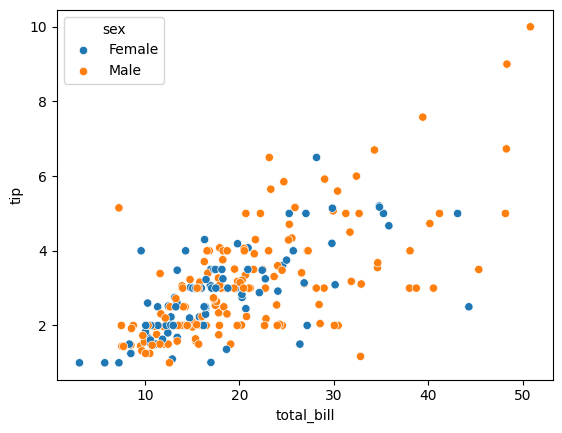

In [12]:
sns.scatterplot(data = df, x= 'total_bill', y='tip', hue='sex')
df.value_counts(df['sex'])

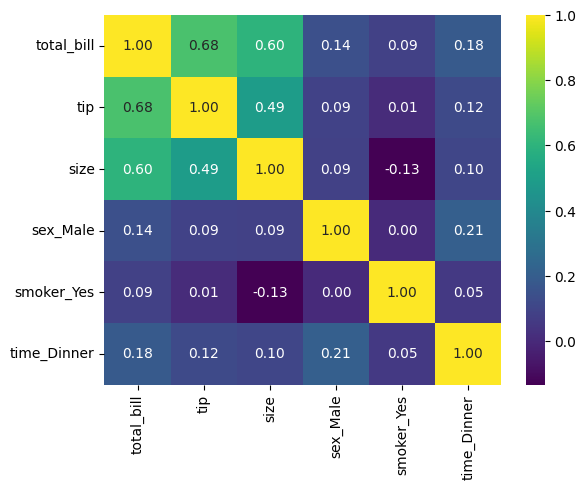

In [11]:

df = pd.get_dummies(df)
df_corr = df.corr()
df_corr.describe()

#Quitamos columnas que no de entrada parecen no estar correlacionadas (como el día de la semana)
#También quitamos columnas altamente correlacionadas entre sí.
dropear_columnas = ['smoker_No', 'sex_Female', 'time_Lunch', 'day_Fri', 'day_Sat', 'day_Sun', 'day_Thur']
df_corr = df_corr.drop(columns= dropear_columnas, index=dropear_columnas)

sns.heatmap(df_corr, annot=True, cmap='viridis', fmt=".2f");


## Predicciones con Scikit Learn
Para realizar las predicciones, vamos a partir de dos dataset: 
1. El dataset de tips completo, sin hacer ninguna modificación.
2. El dataset una vez hayamos procesado los datos.

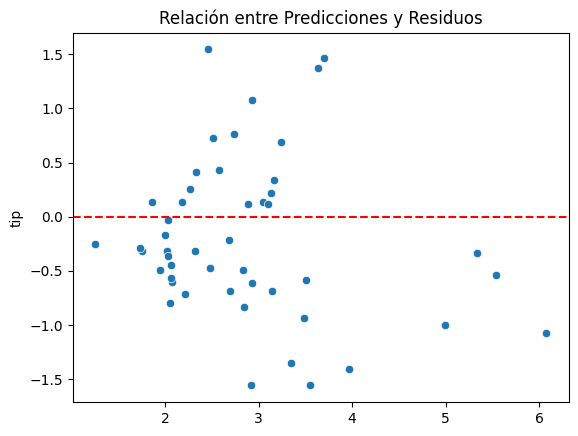

In [12]:
#Comenzamos con el dataset sin procesar los datos.

X = df[['total_bill']]
y = df[['tip']]

# 1. Instanciamos el modelo
model = LinearRegression()

# 2. Partición del modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#3. Entrenamiento: entrenamos sobre nuestras variables de entrenamiento
model.fit(X_train, y_train)

# 3. Predicciones: realizamos la predicción sobre nuestra variable predictiva
y_pred = model.predict(X_test) 

#4. Obtenemos los residuos y los representamos en la gráfica
residuos_1 = y_test - y_pred #Cuanto más cercano sea a 0, más preciso será el modelo
sns.scatterplot(x= y_pred[:,0], y = residuos_1['tip'])
plt.title('Relación entre Predicciones y Residuos')
plt.axhline(y=0, color='r', linestyle='--')




In [ ]:
#No hay patrones observables. Los residuos están distribuidos en torno al 0.

Procedemos a realizar la comparativa entre el test y los datos originales

<Axes: xlabel='total_bill', ylabel='tip'>

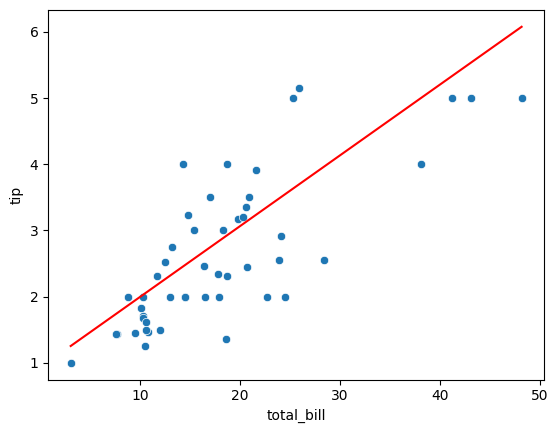

In [13]:
sns.scatterplot(x=X_test['total_bill'], y=y_test['tip']) 

#Para y_pred seleccionamos su primera y única columna, ya que el lineplot solo nos deja coger aquí un array unidimensional
sns.lineplot(x=X_test['total_bill'], y=y_pred[:, 0], c='r')

MAE: mean absolute error

In [14]:
from sklearn.metrics import mean_absolute_error


mae = mean_absolute_error(y_test, y_pred)


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

#Vamos a desglosar la función anterior para ver lo que hace paso a paso (el resultado es el mismo)
def mae_porcentual (y_true, y_pred): 
    #Nos aseguramos que y_true e y_pred son arrrays de numpy
    y_true, y_pred = np.array(y_true), np.array(y_pred)

    #Obtenemos el valor absoluto (ignorando el signo negativo)
    diferencia_prediccion = np.abs(y_true - y_pred)

    #Ahora obtendremos el porcentaje en el que se ha equivocado para cada valor de la columna
    porcentaje = diferencia_prediccion / y_true * 100

    #Finalmente obtenemos la media de todos los errores 
    return np.mean(porcentaje)

mean_absolute_percentage_error(y_test, y_pred)
mae_porc = mae_porcentual (y_test, y_pred)



print(f'MAE Porcentual: {np.round(mae_porc,3)} \nMAE: {np.round(mae,3)}')

MAE Porcentual: 26.395 
MAE: 0.621


MSE: Mean Squared Error o Error Cuadrático Medio

In [15]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'MSE: {np.round(mse,3)} \nRMSE: {np.round(rmse,3)}')

resultados = pd.DataFrame({
     'MAE' : [mae],
     'MAE Porcentual' : [mae_porc],
     'MSE': [mse],
     'RMSE' : [rmse],
     'R2' : [model.score(X_train, y_train)]
}, index=['resultado'])

resultados


MSE: 0.569 
RMSE: 0.754


c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,MAE,MAE Porcentual,MSE,RMSE,R2
resultado,0.620858,26.395166,0.568814,0.754198,0.430951


En este punto, aún desconocemos lo eficaz que es el modelo propuesto, así que vamos a obtener un segundo modelo intentando predecir las propinas en base al tamaño de la mesa

<Axes: xlabel='size', ylabel='tip'>

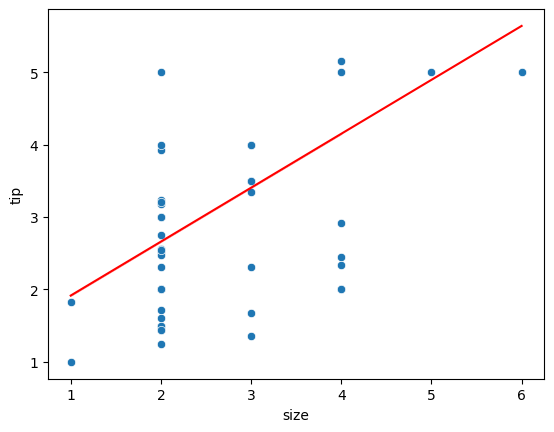

In [16]:
X = df[['size']]
y = df[['tip']]

model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test) 
residuos_2 = y_test - y_pred

sns.scatterplot(x= X_test['size'], y = y_test['tip'])
sns.lineplot(x = X_test['size'], y = y_pred[:,0], c='r')



In [17]:
mae = mean_absolute_error(y_test, y_pred)
mae_porc = mae_porcentual (y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = model.score(X_train,y_train) #El R cuadrado explica qué porcentaje describe tu modelo. Cuanto más alto, mejor


nuevo_registro = {'MAE': mae, 'MAE Porcentual': mae_porc, 'MSE': mse, 'RMSE': rmse, 'R2':r2}
resultados.loc[len(resultados)] = nuevo_registro

resultados


c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,MAE,MAE Porcentual,MSE,RMSE,R2
resultado,0.620858,26.395166,0.568814,0.754198,0.430951
1,0.865020,42.230591,1.118905,1.057783,0.240130


En base a los dos modelos lineales utilizados, podemos establecer que el carácter predictivo de las propinas en relación al tamaño de la mesa o la cuenta total, no es demasiado apropiado. Por lo que podríamos probar con una regresión lineal múltiple.

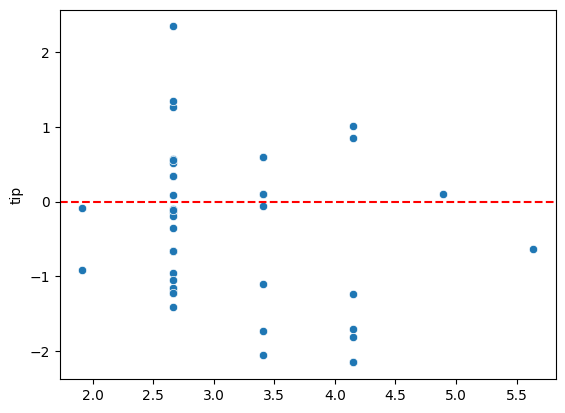

In [18]:
y_pred
sns.scatterplot(x=y_pred[:,0], y=residuos_2['tip'])
plt.axhline(y=0, color='r', linestyle='--')

## TODO Hacer test de varianza, preguntar a Albert para hacer una ANOVA (Analysis of Variance)

## Entrenamos el modelo con todos los datos para ver si se ajusta mejor

c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,MAE,MAE Porcentual,MSE,RMSE,R2
resultado,0.620858,26.395166,0.568814,0.754198,0.430951
1,0.865020,42.230591,1.118905,1.057783,0.240130
2,0.902938,35.100311,1.450141,1.204218,0.239413


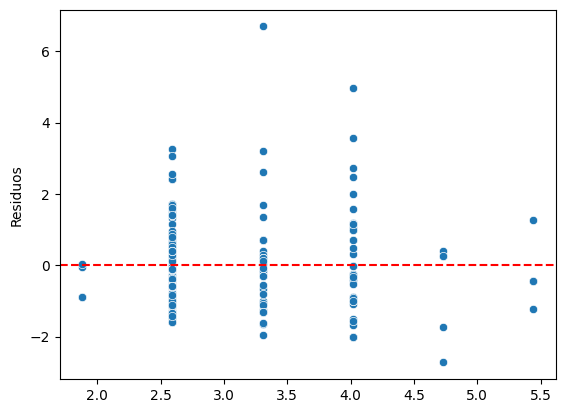

In [20]:
X = df[['size']]
y = df[['tip']]

model = LinearRegression()

model.fit(X,y)
y_prediccion = model.predict(X)

residuos = y - y_prediccion

sns.scatterplot(x=y_prediccion[:,0], y=residuos['tip'])
plt.ylabel('Residuos')
plt.axhline(y=0, color='r', linestyle='--')

mae = mean_absolute_error(y, y_prediccion)
mae_porc = mae_porcentual (y, y_prediccion)
mse = mean_squared_error(y, y_prediccion)
rmse = mean_squared_error(y, y_prediccion, squared=False)
r2 = model.score(X,y) #El R cuadrado explica qué porcentaje describe tu modelo. Cuanto más alto, mejor
model.score(X, y)

nuevo_registro = {'MAE': mae, 'MAE Porcentual': mae_porc, 'MSE': mse, 'RMSE': rmse, 'R2' : r2}
nuevo_registro

resultados.loc[len(resultados)] = nuevo_registro
resultados


In [141]:
model.score(X, y)

0.2394132914419278